#### Things to plot

**Dataset**
- correlation matrix
- histograms of all features
- TSNE

**Single features**
- Analyze single features
    - numeric
    - categorical
    
**Interaction**

- numeric-numeric
- categorical-categorical
- numeric-categorical

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

%matplotlib inline

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 20)

## Dataset visualization

In [4]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [5]:
df['Churn'] = df['Churn'].astype('int')

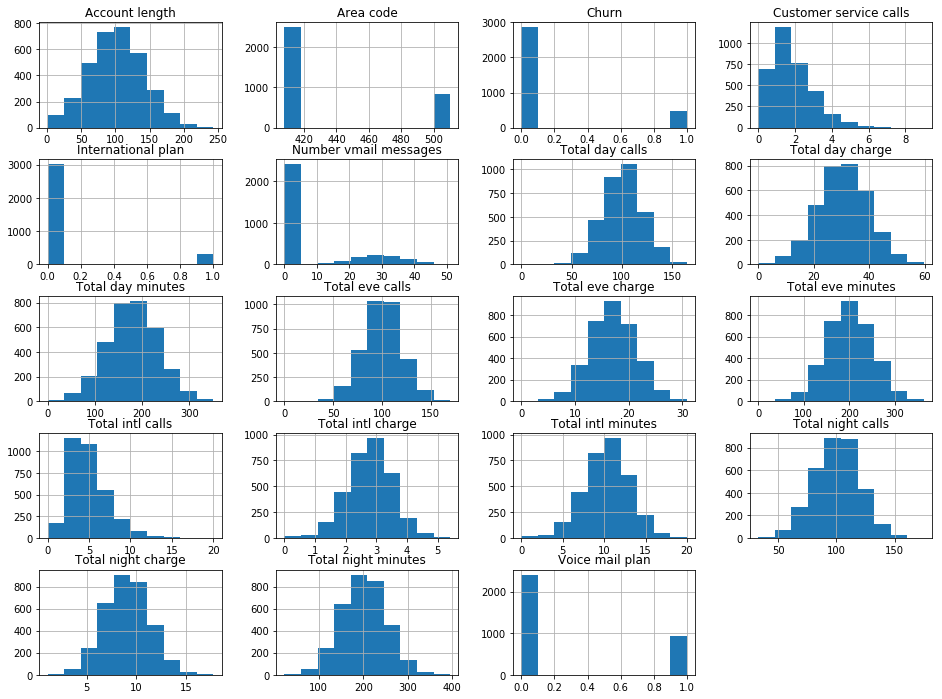

In [6]:
plt.rcParams['figure.figsize'] = (16,12)
df.drop('State', axis=1).hist();

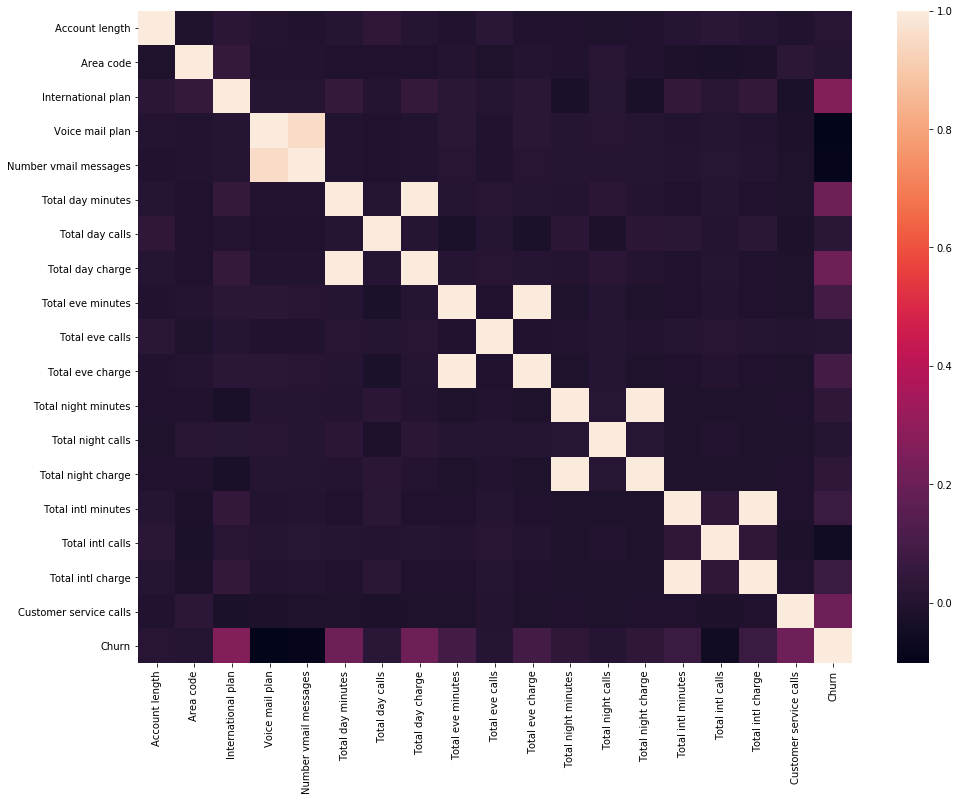

In [7]:
sns.heatmap(df.corr())

#### Notes about correlation

- Correlated variables could cause problems in linear models
- They work normal in ensemble models

In [8]:
df.drop(
    [feat_name for feat_name in df.columns if 'charge' in feat_name],
    axis=1,
    inplace=True
)
df.shape

(3333, 16)

#### tSNE: t-distributed stochastic neighbor  embedding

Find a good mapping of points in d dimensional space to a plane in 2 or 3 dimensions.

In [9]:
state = df['State']
df.drop('State', axis=1, inplace=True)

In [10]:
tsne = TSNE(random_state=17)

In [11]:
%time
X_repr = tsne.fit_transform(df)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 17.9 µs


In [12]:
X_repr.shape

(3333, 2)

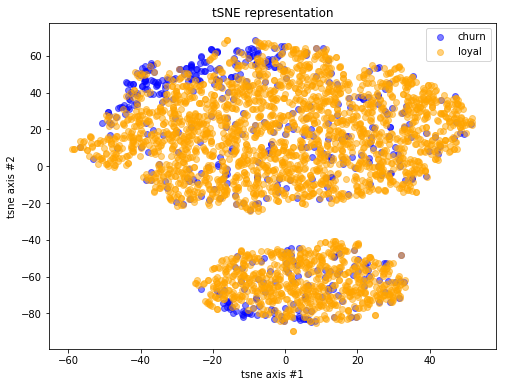

In [13]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.scatter(X_repr[df['Churn'] == 1, 0],
            X_repr[df['Churn'] == 1, 1], alpha=.5, c='blue', label='churn')
plt.scatter(X_repr[df['Churn'] == 0, 0],
            X_repr[df['Churn'] == 0, 1], alpha=.5, c='orange', label='loyal');

plt.xlabel('tsne axis #1')
plt.ylabel('tsne axis #2')
plt.legend()
plt.title('tSNE representation');

In [14]:
df['State'] = state

## Single features visualizations

### Numeric

In [15]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

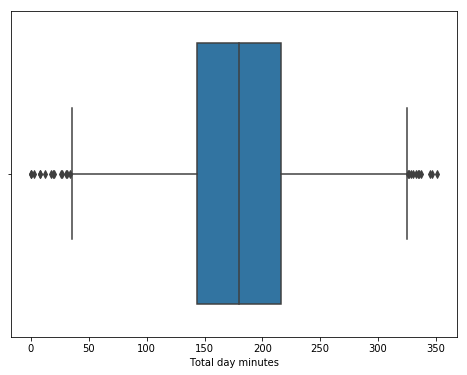

In [16]:
sns.boxplot(x='Total day minutes', data=df);

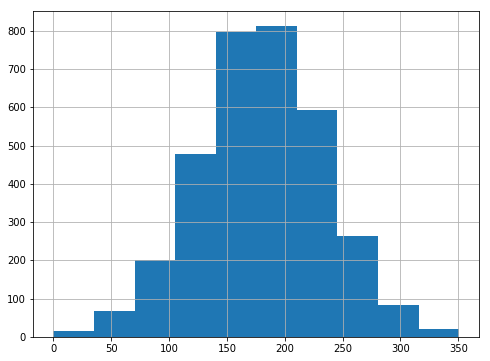

In [17]:
plt.rcParams['figure.figsize'] = (8, 6)
df['Total day minutes'].hist();

### Categorical

#### State

In [18]:
df['State'].nunique()

51

In [19]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

#### Churn

In [20]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [21]:
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

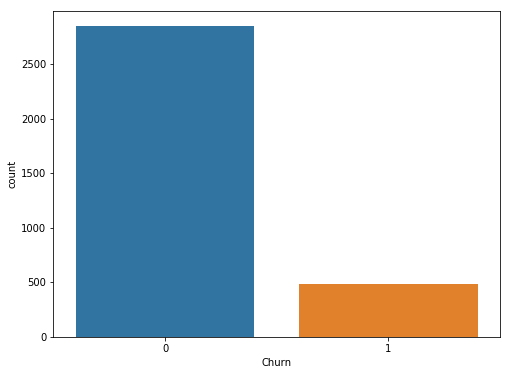

In [22]:
sns.countplot(x='Churn', data=df);

## Interaction between features

### Numeric - Numeric

This plots are very important in regression tasks(when the target is numeric)

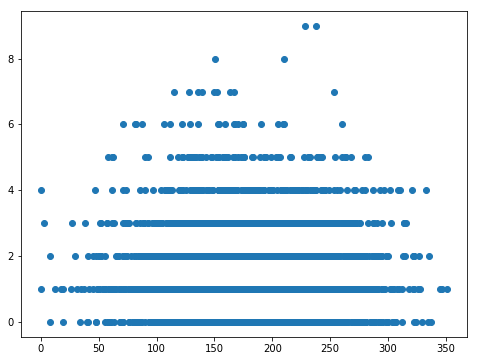

In [23]:
plt.scatter(
    df['Total day minutes'],
    df['Customer service calls']
);

### Categorical - Categorical

In [24]:
pd.crosstab(df['Churn'], df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


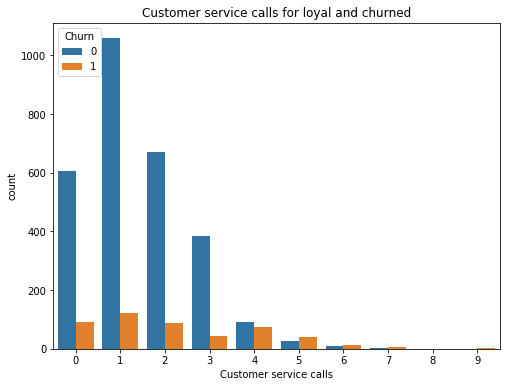

In [25]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.title('Customer service calls for loyal and churned');

From this graphic, we can say that people with many customer service calls start to churn.

### Numeric - Categorical

In [30]:
import numpy as np

In [31]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg(
    [np.median, np.std, np.mean]
)

Total day minutes                        Customer service calls  \
                 median        std        mean                 median   
Churn                                                                   
0                 177.2  50.181655  175.175754                      1   
1                 217.6  68.997792  206.914079                      2   

                           
            std      mean  
Churn                      
0      1.163883  1.449825  
1      1.853275  2.229814

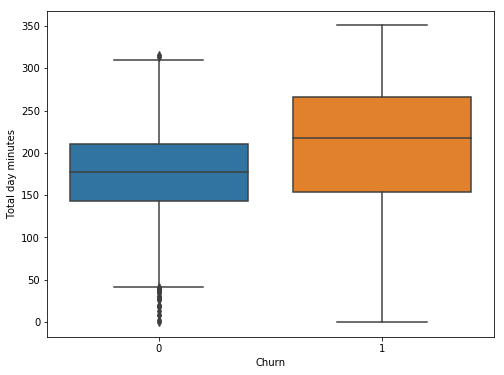

In [33]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

From the plot, Churned customers speak more the loyal customer.